In [1]:
# %load /Users/Andy/jupyter_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3


In [2]:
df_comb = pd.read_csv('data/data_comb.csv')
df_comb.head()


,yday,Nrides,date,Tmean,precip_In,max_gust_mph,cloud_cover,N_stations,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,public
0,182,16650,2013-07-01,76,0.73,26.0,8,326,0,0,0,0,0,0,0.0
1,183,22745,2013-07-02,78,0.06,23.0,7,327,1,0,0,0,0,0,0.0
2,184,21864,2013-07-03,80,0.96,23.0,7,326,0,1,0,0,0,0,0.0
3,185,22326,2013-07-04,84,0.00,24.0,4,324,0,0,1,0,0,0,0.0
4,186,21842,2013-07-05,85,0.00,23.0,1,325,0,0,0,1,0,0,0.0


In [7]:
# split into training/testing sets
training = df_comb[df_comb.date<'2016-03-31']
testing  = df_comb[df_comb.date>'2016-03-31']
training.date.max()
testing.date.max()

'2017-03-31'

In [11]:
Xtrain = training.drop(['date','Nrides'], axis=1)
Xtest  = testing.drop(['date','Nrides'], axis=1)

ytrain = training['Nrides']
ytest  = testing['Nrides']


In [17]:
from sklearn.linear_model    import LinearRegression
from sklearn.preprocessing   import Imputer
from sklearn.model_selection import cross_val_score

imp = Imputer(strategy='mean')
imp.fit(Xtrain)
Xtrain = imp.transform(Xtrain)
Xtest  = imp.transform(Xtest)
#Xall = imp.transform(X)

linreg = LinearRegression()
linreg.fit(Xtrain,ytrain)
linreg.score(Xtrain,ytrain)
linreg.score(Xtest,ytest)

0.7096206301619958

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


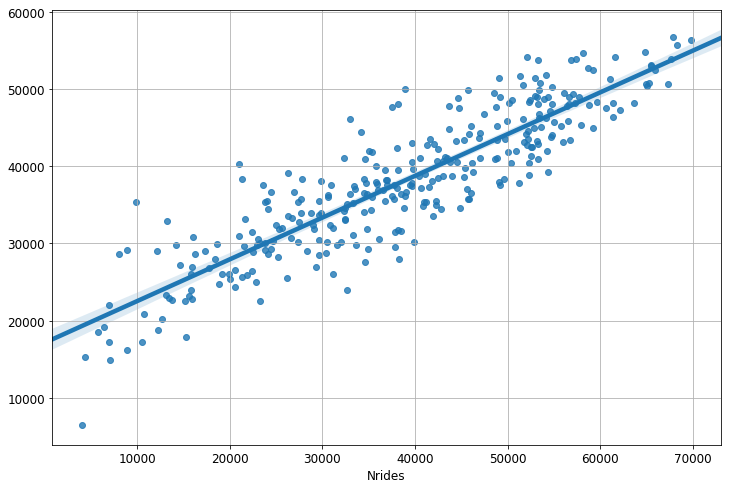

In [19]:
plt.figure(figsize=(12,8))
sns.regplot(ytest, linreg.predict(Xtest))
plt.grid();

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(Xtrain,ytrain)
rf.score(Xtrain,ytrain)
rf.score(Xtest,ytest)


0.6094297005612409

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


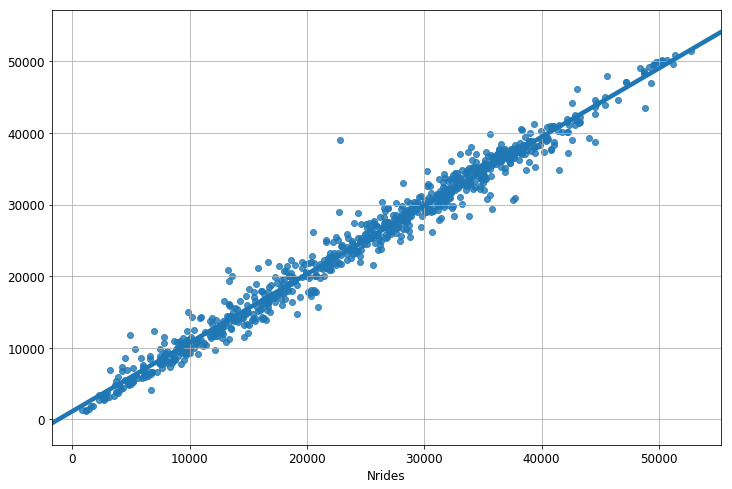

In [30]:
plt.figure(figsize=(12,8))
sns.regplot(ytrain, rf.predict(Xtrain))
#sns.regplot(ytest, rf.predict(Xtest))
plt.grid()


In [26]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,150],'min_samples_split':[2,5,10]}
rf2 = RandomForestRegressor()
cv = GridSearchCV(rf2, params)
cv.fit(Xtrain, ytrain)
rf2 = cv.best_estimator_
np.mean( cross_val_score(rf2, Xtrain, ytrain) )

0.6916683518423482

/Users/Andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


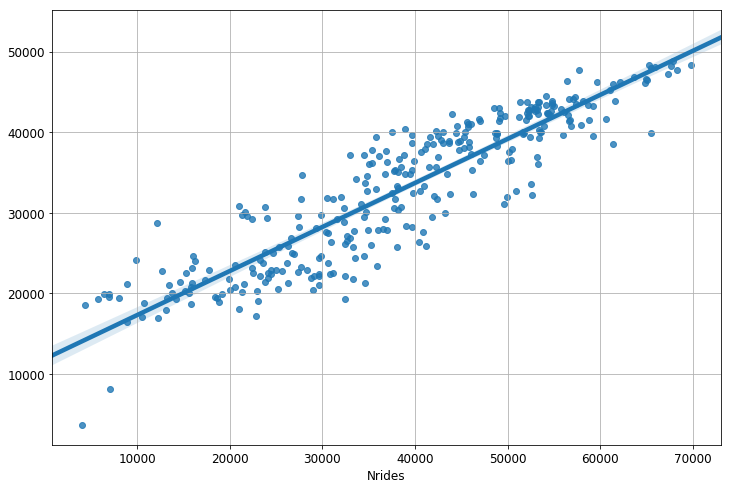

In [29]:
plt.figure(figsize=(12,8))
sns.regplot(ytest, rf2.predict(Xtest))
plt.grid()

In [32]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(Xtrain,ytrain)
las.score(Xtrain,ytrain)
las.score(Xtest,ytest)

0.7094689655594304

In [35]:
from sklearn.linear_model import ridge_regression
rid = ridge_regression()
rid.fit(Xtrain,ytrain)

TypeError: 'module' object is not callable